In [81]:
import os
import random
from tqdm import tqdm
import numpy as np
import pandas as pd
import pickle

import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import cv2

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

np.random.seed(2)
sns.set(style='white', context='notebook', palette='deep')

In [82]:
raw_labels = pd.read_csv("data/labels.csv")

In [83]:
labels_only = raw_labels['breed']

labels_set = set(labels_only)

num_labels = len(labels_set)


map_breed = {}


i=0;

for breed in labels_set:
    map_breed[breed] = i
    i+=1
    

label_map={}
for i in range(len(raw_labels['id'])):
    label_map[raw_labels['id'][i]] = map_breed[raw_labels['breed'][i]]
    

In [84]:
def show_data(path, IMG_SIZE, num):
    i=0
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
#             img_array = cv2.imread(os.path.join(path,img))
            plt.imshow(img_array)
            plt.show()
            
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            plt.imshow(new_array)
            plt.show()         
        except Exception as e: 
            pass
        if i>num:
            break
        i+=1


def read_prep_data(path, IMG_SIZE, label_map):
    data=[]
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
            data.append([new_array, label_map[img[:-4]]])  
        except Exception as e: 
            pass
    return data
        
    
def select_categories(data, num_label):
    X=[]
    Y=[]
    
    random.shuffle(data)
    
    for features,label in training_data:
        if label in range(0, num_label):
            X.append(features)
            Y.append(label)
    return X, Y



In [85]:
def pickle_save(data, path):
    pickle_out = open(path,"wb")
    pickle.dump(data, pickle_out)
    pickle_out.close()
    
def pickle_load(path):
    pickle_in = open(path,"rb")
    return pickle.load(pickle_in)
    

In [101]:
def get_model(IMG_SIZE, num_label):
    model = Sequential()

    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu', input_shape = (IMG_SIZE,IMG_SIZE,1)))
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(num_label, activation = "softmax"))
    
    return model

In [87]:
training_path = "data/train"
testing_path = "data/test"
IMG_SIZE = 100
num=10

  0%|          | 0/10222 [00:00<?, ?it/s]

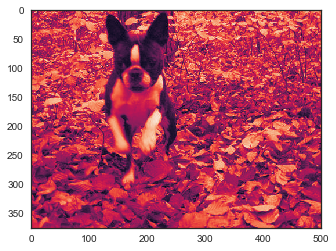

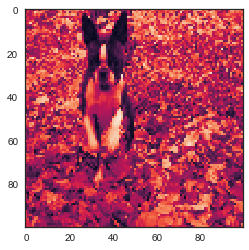

  0%|          | 1/10222 [00:00<37:34,  4.53it/s]

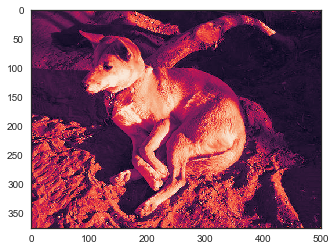

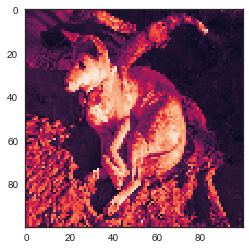

  0%|          | 2/10222 [00:00<39:16,  4.34it/s]

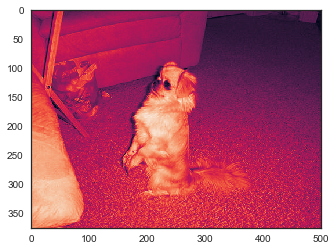

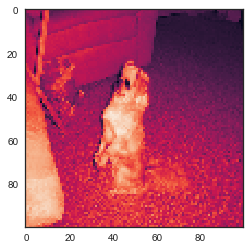

  0%|          | 3/10222 [00:00<38:52,  4.38it/s]

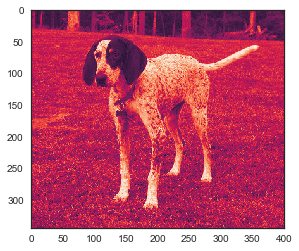

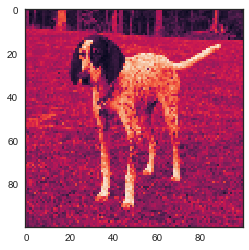

  0%|          | 4/10222 [00:00<38:09,  4.46it/s]

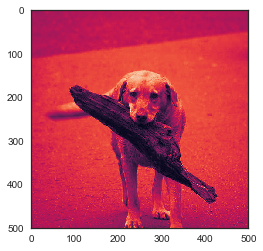

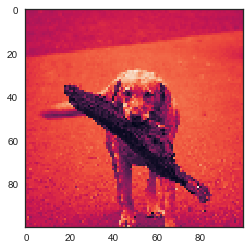

  0%|          | 5/10222 [00:01<37:04,  4.59it/s]

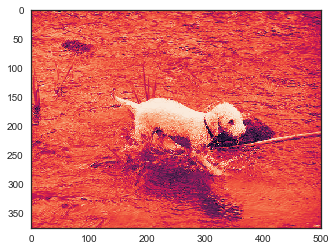

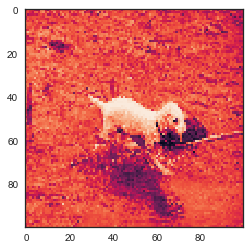

  0%|          | 6/10222 [00:01<37:01,  4.60it/s]

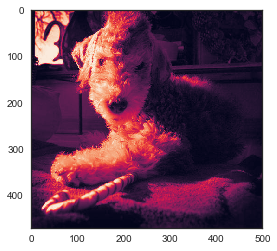

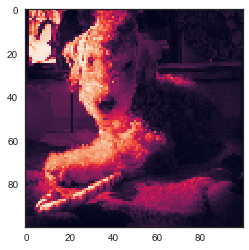

  0%|          | 7/10222 [00:01<36:26,  4.67it/s]

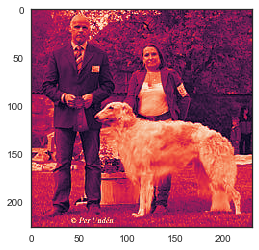

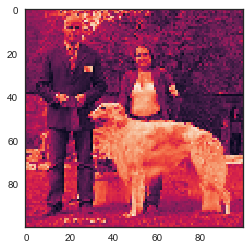

  0%|          | 8/10222 [00:01<35:55,  4.74it/s]

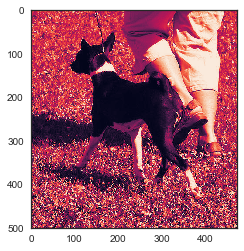

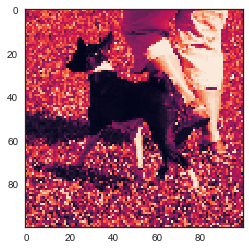

  0%|          | 9/10222 [00:01<35:33,  4.79it/s]

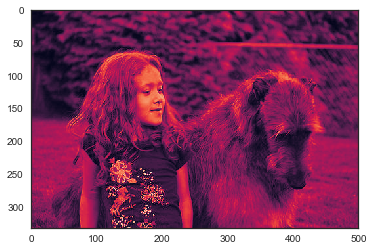

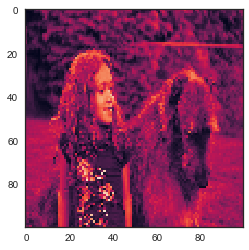

  0%|          | 10/10222 [00:02<35:57,  4.73it/s]

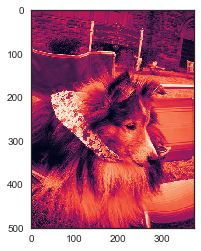

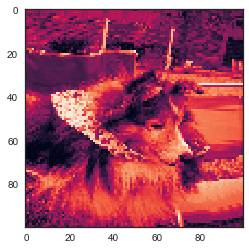

  0%|          | 11/10222 [00:02<35:25,  4.80it/s]

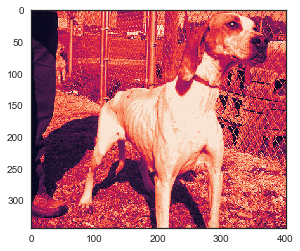

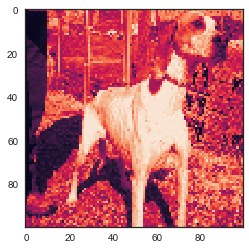

In [88]:
show_data(training_path, IMG_SIZE, num)

  0%|          | 0/10357 [00:00<?, ?it/s]

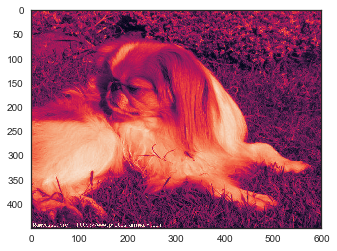

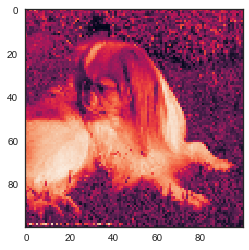

  0%|          | 1/10357 [00:00<39:32,  4.36it/s]

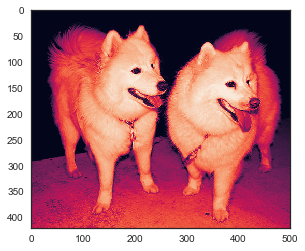

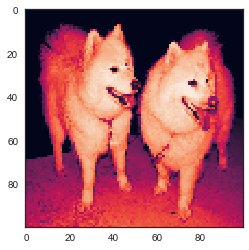

  0%|          | 2/10357 [00:00<39:45,  4.34it/s]

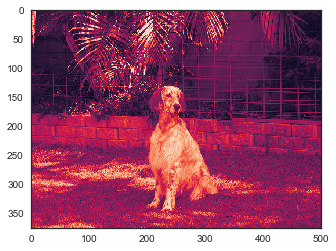

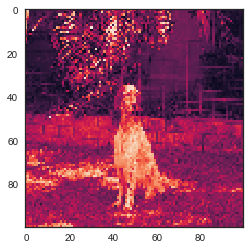

  0%|          | 3/10357 [00:00<39:35,  4.36it/s]

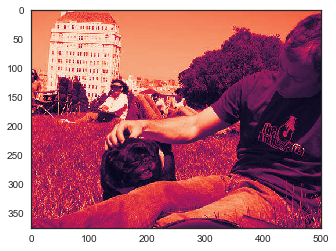

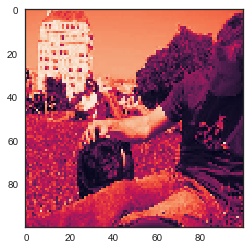

  0%|          | 4/10357 [00:00<39:07,  4.41it/s]

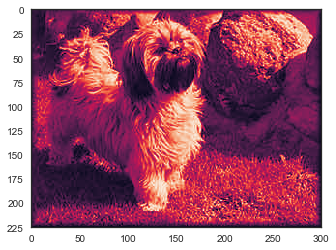

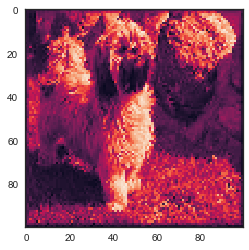

  0%|          | 5/10357 [00:01<38:47,  4.45it/s]

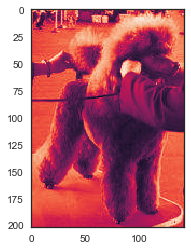

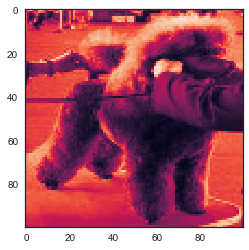

  0%|          | 6/10357 [00:01<39:59,  4.31it/s]

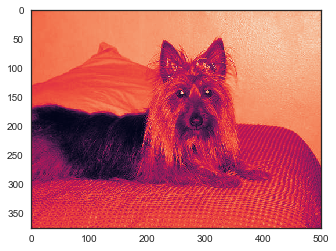

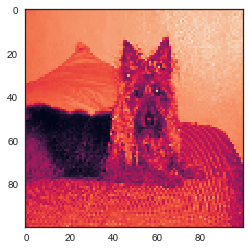

  0%|          | 7/10357 [00:01<39:30,  4.37it/s]

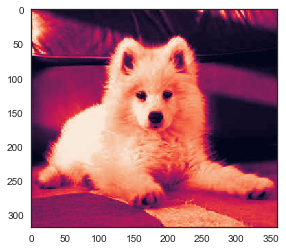

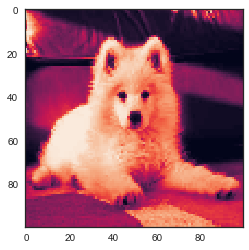

  0%|          | 8/10357 [00:01<38:49,  4.44it/s]

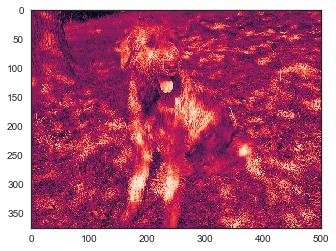

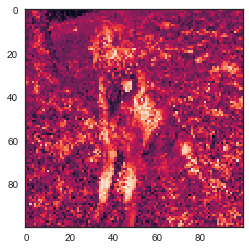

  0%|          | 9/10357 [00:02<38:41,  4.46it/s]

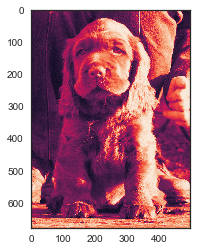

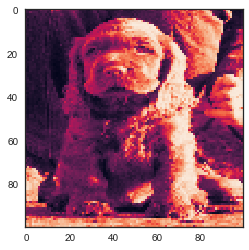

  0%|          | 10/10357 [00:02<38:03,  4.53it/s]

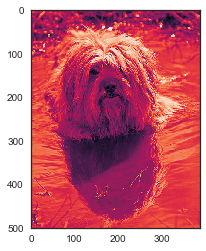

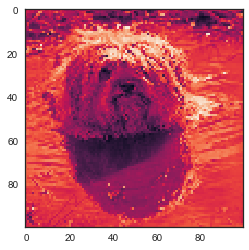

  0%|          | 11/10357 [00:02<37:24,  4.61it/s]

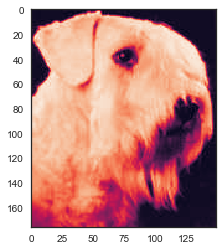

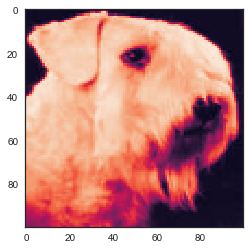

In [89]:
show_data(testing_path, IMG_SIZE, num)

In [90]:
training_data = read_prep_data(training_path, IMG_SIZE, label_map)
testing_data = read_prep_data(testing_path, IMG_SIZE, label_map)

print(len(training_data))
print(len(testing_data))

100%|██████████| 10357/10357 [00:16<00:00, 636.31it/s]


10222
0


In [91]:
num_label = num_labels
num_label = 5

In [92]:
X_train, Y_train = select_categories(training_data, num_label)
X_test, Y_test = select_categories(testing_data, num_label)
 
print(set(Y_train))
print(len(Y_train))

print(set(Y_test))
print(len(Y_test))

{0, 1, 2, 3, 4}
426
{0, 1, 2, 3, 4}
426


In [93]:
Y_train = to_categorical(Y_train, num_classes = num_label)
Y_test = to_categorical(Y_test, num_classes = num_label)

In [94]:
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [95]:
directory = "data/"
X_train_path_p, Y_train_path_p, X_test_path_p, Y_test_path_p = "X_train", "Y_train", "X_test", "Y_test"

In [96]:
pickle_save(X_train, directory+X_train_path_p)
pickle_save(Y_train, directory+Y_train_path_p)
pickle_save(X_test, directory+X_test_path_p)
pickle_save(Y_test, directory+Y_test_path_p)

In [97]:
X_train = pickle_load(directory+X_train_path_p)
Y_train = pickle_load(directory+Y_train_path_p)
X_test = pickle_load(directory+X_test_path_p)
Y_test = pickle_load(directory+Y_test_path_p)

In [98]:
norm = 255.0
X_train, X_test = X_train/norm, X_test/norm

In [99]:
# Define the optimizer
# optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
optimizer = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [102]:
model = get_model(IMG_SIZE, num_label)
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [103]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.001)

In [104]:
epochs = 100 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 32

In [105]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [ ]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/100
 - 49s - loss: 11.1409 - acc: 0.2633 - val_loss: 11.9183 - val_acc: 0.2606
Epoch 2/100


In [2]:
start = dt.datetime.now()

In [3]:
cache_dir = expanduser(join('~', '.keras'))
if not exists(cache_dir):
    makedirs(cache_dir)
models_dir = join(cache_dir, 'models')
if not exists(models_dir):
    makedirs(models_dir)

In [6]:
model = ResNet50(weights='imagenet')

 25837568/102853048 [======>.......................] - ETA: 3:16:4 - ETA: 1:27:2 - ETA: 1:11:1 - ETA: 1:00:2 - ETA: 51:24  - ETA: 48:0 - ETA: 42:4 - ETA: 41:3 - ETA: 38:5 - ETA: 34:2 - ETA: 33:0 - ETA: 31:2 - ETA: 30:2 - ETA: 27:1 - ETA: 26:4 - ETA: 23:5 - ETA: 23:3 - ETA: 22:0 - ETA: 21:0 - ETA: 19:5 - ETA: 18:4 - ETA: 18:0 - ETA: 16:5 - ETA: 15:4 - ETA: 14:5 - ETA: 14:1 - ETA: 13:1 - ETA: 12:4 - ETA: 12:0 - ETA: 11:2 - ETA: 10:5 - ETA: 10:2 - ETA: 10:0 - ETA: 10:0 - ETA: 9:5 - ETA: 9: - ETA: 10:1 - ETA: 9:4 - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA

 75431936/102853048 [=====================>........] - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 

 98918400/102853048 [===========================>..] - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 

102858752/102853048 [==============================] - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  